In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [5]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [6]:
df['Gender'] = df['Gender'].map({'F' : 0, 'M' : 1})

In [7]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [8]:
df['Age'] = df['Age'].map({'0-17' : 0, '18-25' : 1, '26-35' : 2, '36-45' : 3, '46-50' : 4, '51-55':5,'55+':6})

In [9]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [12]:
df_city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
550063,True,False
550064,False,True
550065,True,False
550066,False,True


In [13]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,False,True


In [14]:
df.drop('City_Category',axis=1,inplace=True)

In [15]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [16]:
df.drop(['Product_ID'], axis = 1, inplace = True)

In [17]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,1,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,2,1,1,20,NaN,NaN,368
550064,0,2,1,1,3,0,20,NaN,NaN,371
550065,0,2,15,2,4+,1,20,NaN,NaN,137
550066,0,6,1,1,2,0,20,NaN,NaN,365


In [18]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [16]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,False,False
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,8.0,16.0,368,True,False
550064,P00375436,0,2,1,3,0,20,8.0,16.0,371,False,True
550065,P00375436,0,2,15,4+,1,20,8.0,16.0,137,True,False
550066,P00375436,0,6,1,2,0,20,8.0,16.0,365,False,True


In [17]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [18]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [19]:
df['B']= df["B"].astype(int)
df['C']= df["C"].astype(int)

In [23]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)
df.drop('Product_ID',axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   Stay_In_Current_City_Years  550068 non-null  int32
 4   Marital_Status              550068 non-null  int64
 5   Product_Category_1          550068 non-null  int64
 6   Product_Category_2          550068 non-null  int32
 7   Product_Category_3          550068 non-null  int32
 8   Purchase                    550068 non-null  int64
 9   B                           550068 non-null  int32
 10  C                           550068 non-null  int32
dtypes: int32(5), int64(6)
memory usage: 35.7 MB


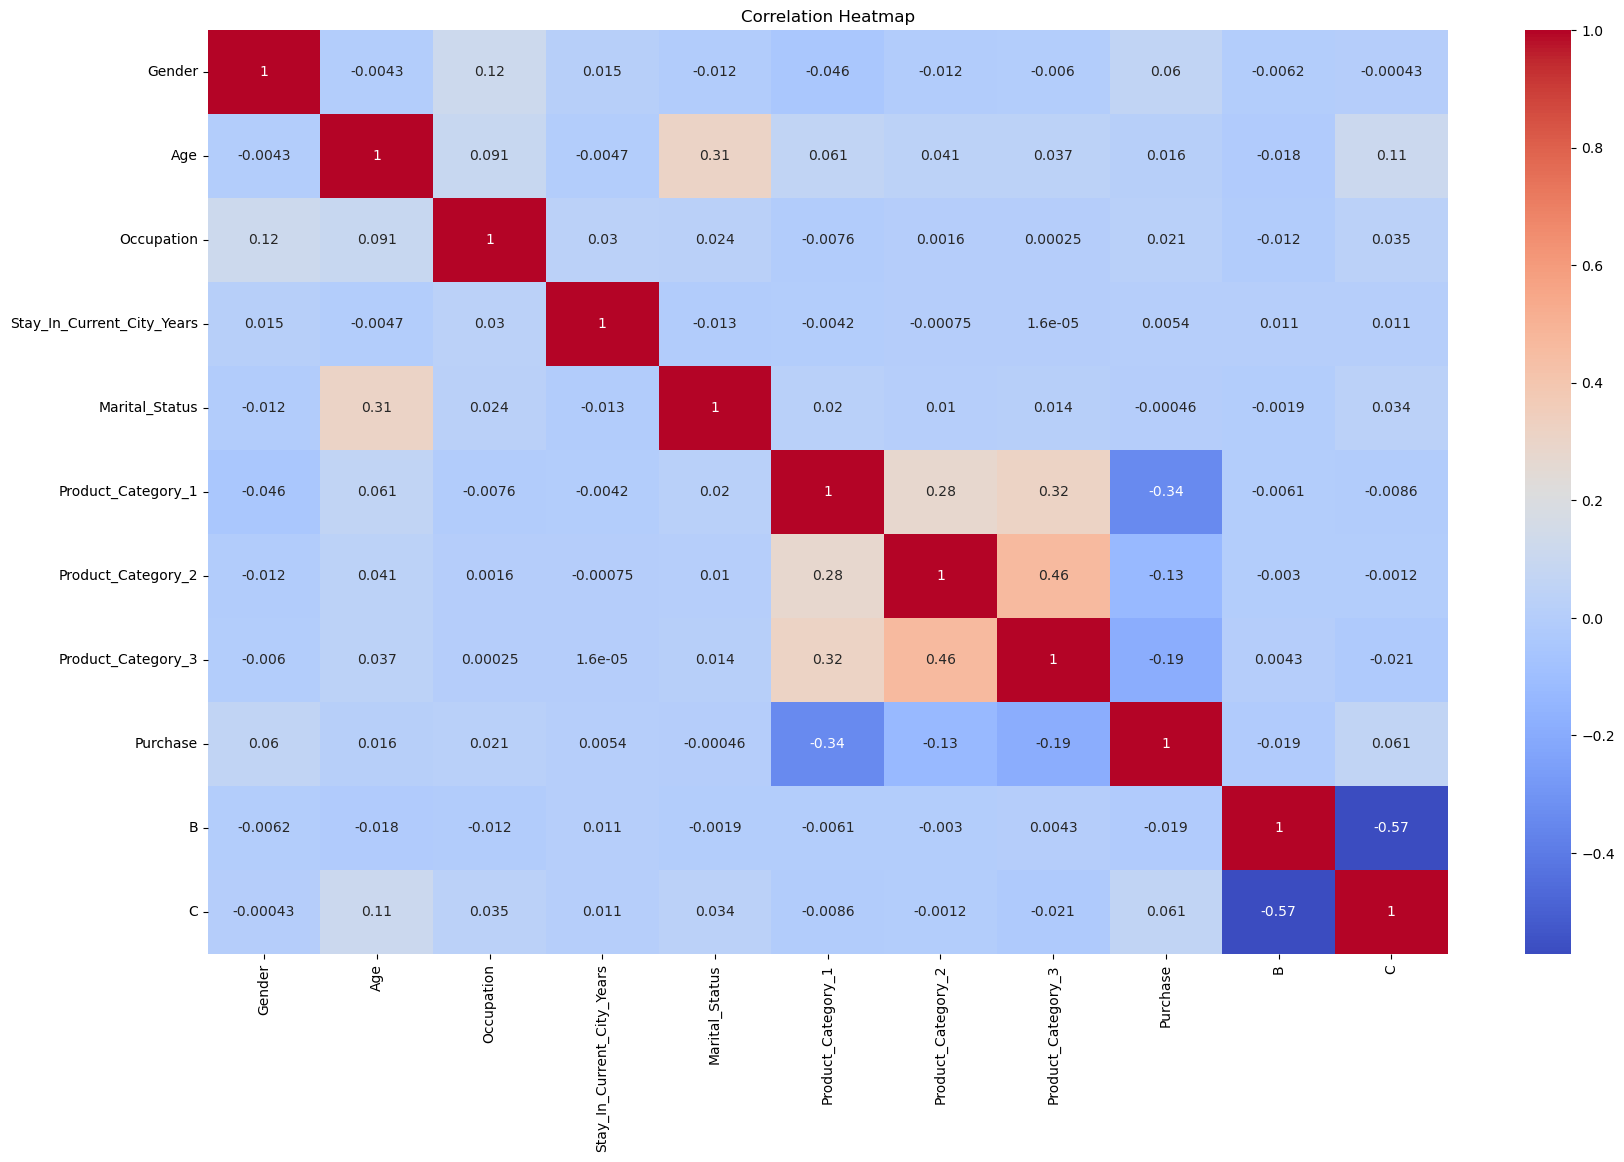

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

<Axes: xlabel='Age', ylabel='Purchase'>

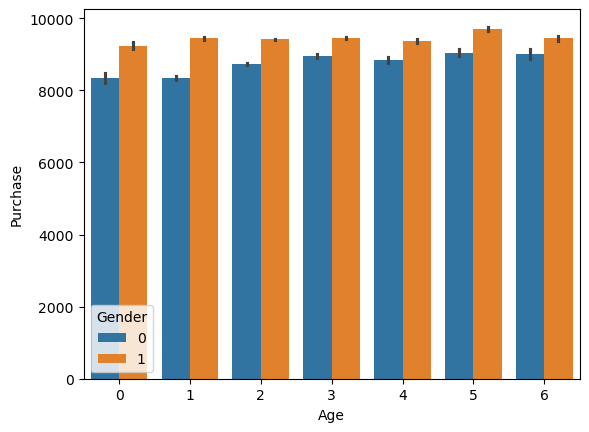

In [26]:
df['Gender'] = df['Gender'].astype(int)
sns.barplot(x="Age", y="Purchase",hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

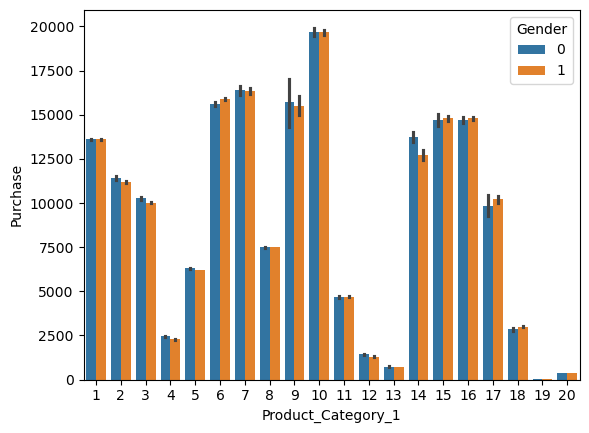

In [27]:
sns.barplot(x="Product_Category_1", y="Purchase",hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

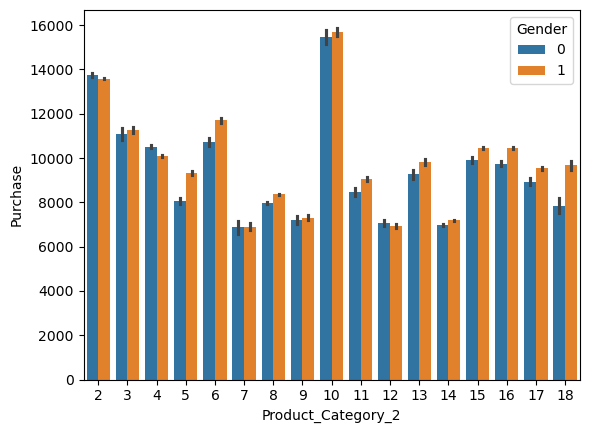

In [28]:
sns.barplot(x="Product_Category_2", y="Purchase",hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

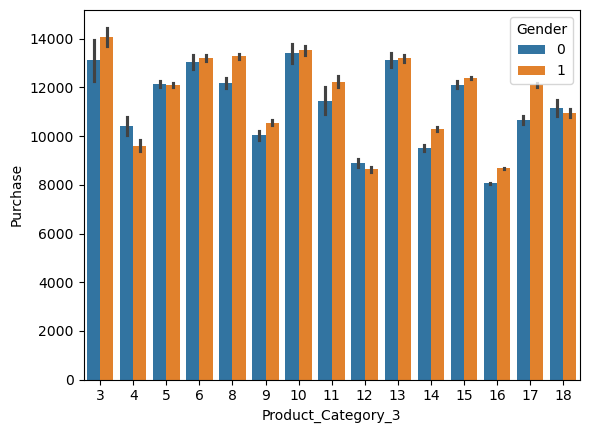

In [29]:
sns.barplot(x="Product_Category_3", y="Purchase",hue='Gender',data=df)

In [30]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]
X=df_train.drop('Purchase',axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8,16,0,0
1,0,0,10,2,0,1,6,14,0,0
2,0,0,10,2,0,12,8,16,0,0
3,0,0,10,2,0,12,14,16,0,0
4,1,6,16,4,0,8,8,16,0,1


In [31]:
X.shape

(550068, 10)

In [32]:
y=df_train['Purchase']

In [33]:
y.shape

(550068,)

In [34]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(440054, 10)

In [37]:
X_test.shape

(110014, 10)

In [38]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
lm=LinearRegression()
lm.fit(X_train, y_train)
w=lm.coef_
b=lm.intercept_
print(w)
print(b)

[  224.82801154   162.13523104    40.95016485    11.94794785
   -25.44245483 -1587.94541555    -7.86954243  -424.48723499
    76.43234381   306.90710128]
9266.733955378204


In [40]:
predictions=lm.predict(X_test)
predictions

array([11819.97337905, 10458.02800875,  7368.21655916, ...,
        8028.47735469,  6760.8538733 ,  9169.52521706])

In [41]:
RF = RandomForestRegressor(n_estimators=10,max_depth=7,n_jobs=-1,random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=10, n_jobs=-1, random_state=42)

In [42]:
y_pred = RF.predict(X_test)
y_pred

array([14249.42826087, 13131.0589735 ,  7469.94710896, ...,
        7469.94710896,  4635.53179355,  9608.9004499 ])

In [43]:
y_test

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
133324    19139
138718     7856
22886      4037
137110     7467
515193     8002
Name: Purchase, Length: 110014, dtype: int64

In [44]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

2252.619916329535

In [45]:
r2_score(y_test, y_pred)

0.6437529128843316

In [46]:
print(mean_squared_error(y_test, y_pred))

8951128.415722616


In [47]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2991.8436482748584


In [48]:
y.mean()

9263.968712959126

In [49]:
y_test.mean()

9252.907793553548